In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 8E3B-8C2C

 Directory of C:\Users\lenovo\Desktop\Python codes\project 3

10/27/2024  08:42 PM    <DIR>          .
10/27/2024  08:42 PM    <DIR>          ..
10/27/2024  08:42 PM    <DIR>          .ipynb_checkpoints
10/27/2024  08:19 PM            81,530 agedist_police.png
10/27/2024  08:19 PM           660,117 countarmed_police.png
10/27/2024  03:08 AM           122,535 elbow_method.png
10/27/2024  08:19 PM           119,388 elbow_police.png
10/27/2024  04:48 PM         1,923,584 fatal-police-shootings-data-continental-us (1).xls
10/27/2024  08:23 PM           113,226 filtered_police.png
10/27/2024  08:42 PM                72 finalpolice.ipynb
07/18/2022  06:46 PM                 5 gadm41_IND_0.cpg
07/18/2022  06:46 PM               224 gadm41_IND_0.dbf
07/18/2022  06:46 PM               145 gadm41_IND_0.prj
07/18/2022  06:46 PM         7,965,240 gadm41_IND_0.shp
07/18/2022  06:46 PM               148 gadm41_IND_0.shx
07/18/2022 

In [3]:
import pandas as pd

In [5]:
data = pd.read_excel('fatal-police-shootings-data-continental-us (1).xls')

In [7]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,latitude,longitude,is_geocoding_exact
0,6479,La Garion Lamar Smith,2021-01-03,shot,gun,27.0,M,B,Homestead,FL,False,attack,Foot,False,25.437,-80.475,True
1,3734,Juvan Simon,2018-05-30,shot,gun,23.0,M,B,Florida City,FL,False,undetermined,Not fleeing,False,25.461,-80.480,True
2,647,Edward Foster III,2015-07-16,shot,gun,35.0,M,B,Homestead,FL,False,attack,Not fleeing,False,25.462,-80.493,True
3,1480,Francis Scot Dufore,2016-04-20,shot,gun,41.0,M,W,Homestead,FL,False,attack,Not fleeing,False,25.493,-80.484,True
4,916,Jorge Santiago Tapia,2015-10-15,shot,gun,15.0,M,H,Miami,FL,False,attack,Car,False,25.507,-80.413,True


In [9]:
# Step 1: Data Preprocessing
# Dropping unnecessary columns and keeping only latitude and longitude for clustering
coordinates = data[['latitude', 'longitude']]

# Display the first few rows to verify
print(coordinates.head())
print(coordinates.info())  # To check if there are any missing values

   latitude  longitude
0    25.437    -80.475
1    25.461    -80.480
2    25.462    -80.493
3    25.493    -80.484
4    25.507    -80.413
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   6171 non-null   float64
 1   longitude  6171 non-null   float64
dtypes: float64(2)
memory usage: 101.3 KB
None


In [11]:
# Step 2: Drop rows with missing latitude or longitude
coordinates_clean = coordinates.dropna()

# Verify the number of rows after dropping
print(coordinates_clean.info())
print(coordinates_clean.head())  # Display first few rows after cleaning

<class 'pandas.core.frame.DataFrame'>
Index: 6171 entries, 0 to 6170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   6171 non-null   float64
 1   longitude  6171 non-null   float64
dtypes: float64(2)
memory usage: 144.6 KB
None
   latitude  longitude
0    25.437    -80.475
1    25.461    -80.480
2    25.462    -80.493
3    25.493    -80.484
4    25.507    -80.413


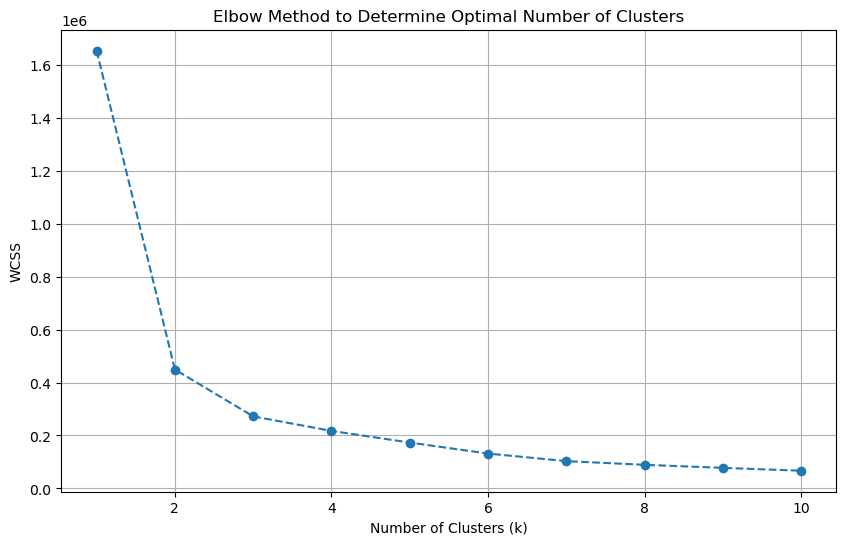

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 3: Determine Optimal Number of Clusters using Elbow Method
wcss = []  # Within-Cluster Sum of Squares

# Test different values of k from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(coordinates_clean)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/elbow_police.png', bbox_inches='tight', dpi=300)
plt.show()

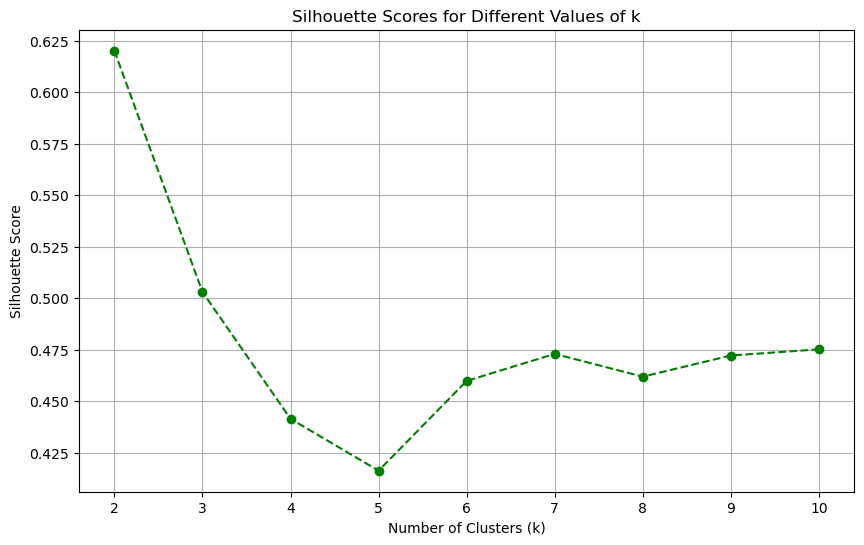

In [15]:
from sklearn.metrics import silhouette_score
import numpy as np

# Step 4: Calculate Silhouette Scores for Different Values of k (from 2 to 10)
silhouette_scores = []

# Silhouette Score only makes sense for k >= 2
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(coordinates_clean)
    score = silhouette_score(coordinates_clean, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/silhouette_score_police.png', bbox_inches='tight', dpi=300)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18632\1224012045.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coordinates_clean['cluster'] = kmeans.fit_predict(coordinates_clean)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18632\1224012045.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


   latitude  longitude  cluster
0    25.437    -80.475        0
1    25.461    -80.480        0
2    25.462    -80.493        0
3    25.493    -80.484        0
4    25.507    -80.413        0


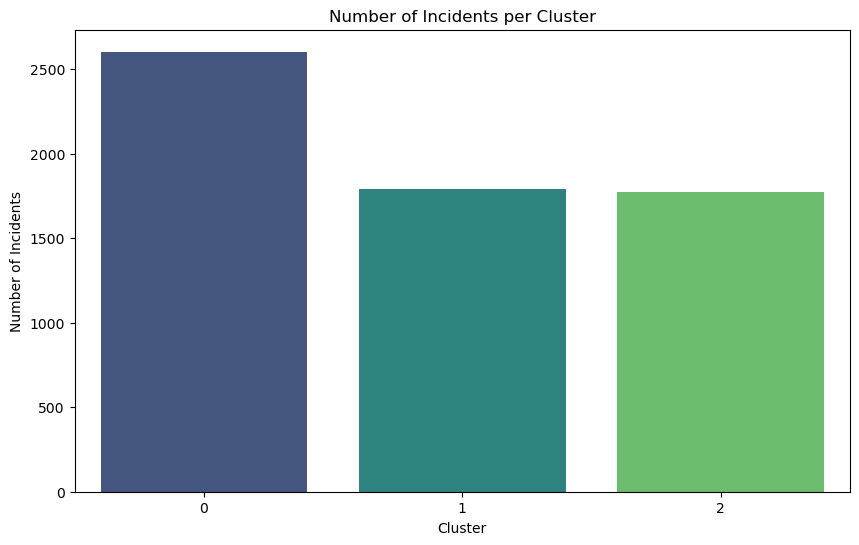

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming coordinates_clean already contains cleaned latitude and longitude data

# Step 1: Apply k-means clustering with k=3 (optimal number of clusters from elbow method)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
coordinates_clean['cluster'] = kmeans.fit_predict(coordinates_clean)

# Verify the cluster column has been added
print(coordinates_clean.head())

# Now we move to the next step: plotting the number of incidents per cluster
# Step 2: Count the number of incidents per cluster
cluster_counts = coordinates_clean['cluster'].value_counts().sort_index()

# Plotting Number of Incidents per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Incidents per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Incidents')
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/incidents_police.png', bbox_inches='tight', dpi=300)
plt.show()


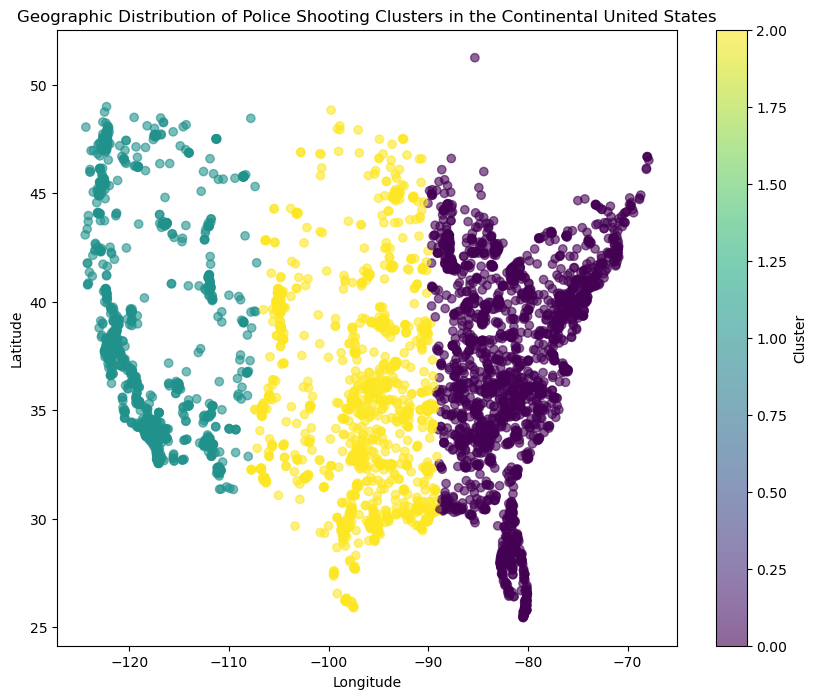

In [21]:
import matplotlib.pyplot as plt

# Step 4: Plotting the geographic distribution of clusters
plt.figure(figsize=(10, 8))

# Scatter plot of latitude and longitude colored by cluster
plt.scatter(coordinates_clean['longitude'], coordinates_clean['latitude'], c=coordinates_clean['cluster'], cmap='viridis', alpha=0.6)

plt.title('Geographic Distribution of Police Shooting Clusters in the Continental United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')  # Add a colorbar for reference

# Save the plot to a file
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/geographic_dist_police.png', bbox_inches='tight', dpi=300)
plt.show()


In [25]:
print(data.columns)


Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'latitude', 'longitude', 'is_geocoding_exact'],
      dtype='object')


In [27]:
# Map specific weapon types into broader categories
weapon_mapping = {
    'gun': 'Firearm', 
    'knife': 'Bladed Weapon', 
    'vehicle': 'Vehicle', 
    'unarmed': 'Unarmed'
}

# Add more specific weapons to broader categories
data['armed_category'] = data['armed'].map(weapon_mapping).fillna('Other Weapon')

# Verify the new column has been added correctly
print(data['armed_category'].value_counts())


armed_category
Firearm          3730
Other Weapon     1182
Bladed Weapon     940
Unarmed           413
Vehicle           209
Name: count, dtype: int64


In [33]:
from sklearn.cluster import KMeans

# Step 1: Apply clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
coordinates_clean['cluster'] = kmeans.fit_predict(coordinates_clean)

# Step 2: Merge cluster labels back to original data
data = data.dropna(subset=['latitude', 'longitude'])
data['cluster'] = kmeans.labels_

# Verify that 'cluster' column is in the data
print(data.head())


     id                   name       date manner_of_death armed   age gender  \
0  6479  La Garion Lamar Smith 2021-01-03            shot   gun  27.0      M   
1  3734            Juvan Simon 2018-05-30            shot   gun  23.0      M   
2   647      Edward Foster III 2015-07-16            shot   gun  35.0      M   
3  1480    Francis Scot Dufore 2016-04-20            shot   gun  41.0      M   
4   916   Jorge Santiago Tapia 2015-10-15            shot   gun  15.0      M   

  race          city state  signs_of_mental_illness  threat_level  \
0    B     Homestead    FL                    False        attack   
1    B  Florida City    FL                    False  undetermined   
2    B     Homestead    FL                    False        attack   
3    W     Homestead    FL                    False        attack   
4    H         Miami    FL                    False        attack   

          flee  body_camera  latitude  longitude  is_geocoding_exact  \
0         Foot        False    2

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18632\2921746152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coordinates_clean['cluster'] = kmeans.fit_predict(coordinates_clean)


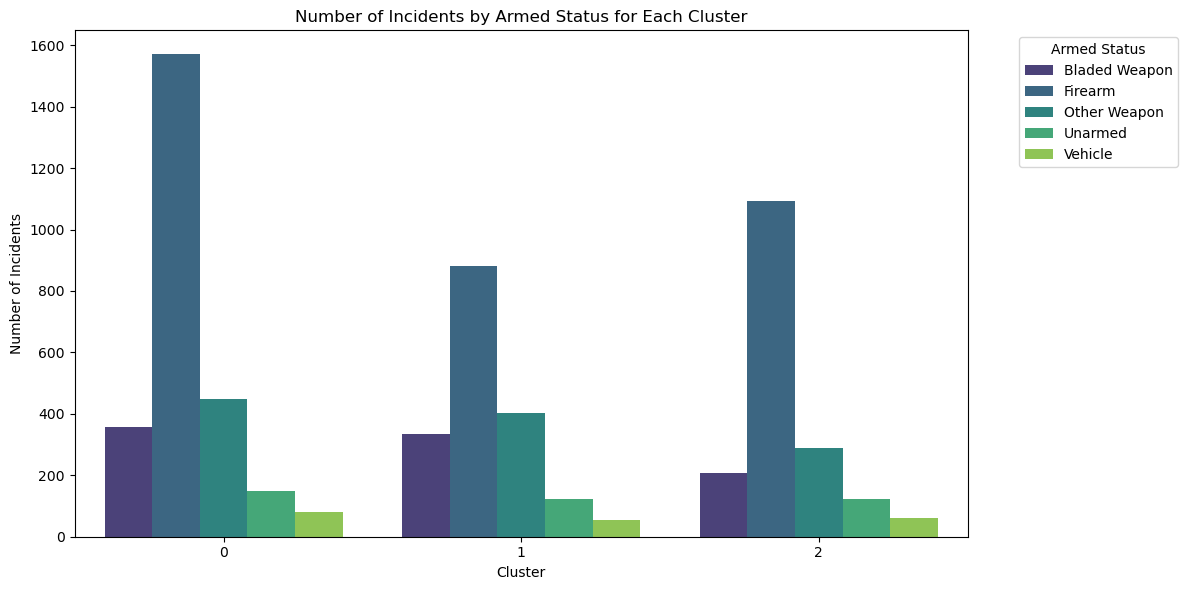

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to only include valid categories
valid_categories = ['Firearm', 'Bladed Weapon', 'Vehicle', 'Other Weapon', 'Unarmed']
filtered_data = data[data['armed_category'].isin(valid_categories)]

# Count the number of incidents by armed status and cluster
incident_counts = filtered_data.groupby(['armed_category', 'cluster']).size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='count', hue='armed_category', data=incident_counts, palette='viridis')

# Set plot title and labels
plt.title('Number of Incidents by Armed Status for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Incidents')
plt.legend(title='Armed Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and save plot
plt.tight_layout()
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/incidentarmedstat_police.png', bbox_inches='tight', dpi=300)
plt.show()


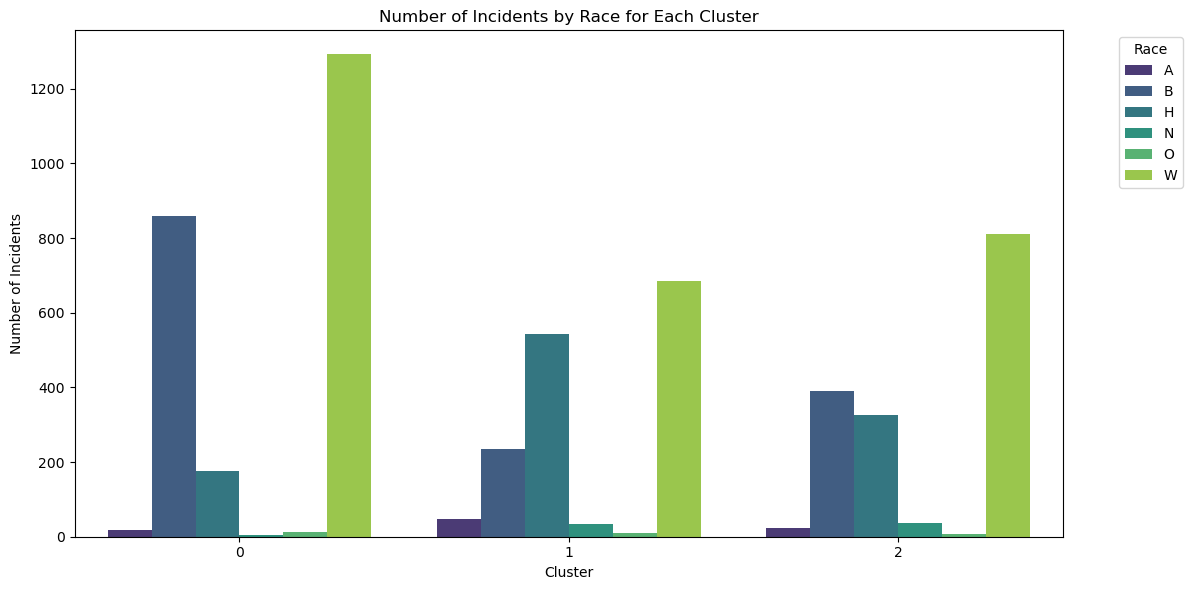

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of incidents by race for each cluster
incident_counts_race = data.groupby(['race', 'cluster']).size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='count', hue='race', data=incident_counts_race, palette='viridis')

# Set plot title and labels
plt.title('Number of Incidents by Race for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Incidents')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and save plot
plt.tight_layout()
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/incidentbyrace_police.png', bbox_inches='tight', dpi=300)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18632\2561924942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='age', data=data, palette='viridis')


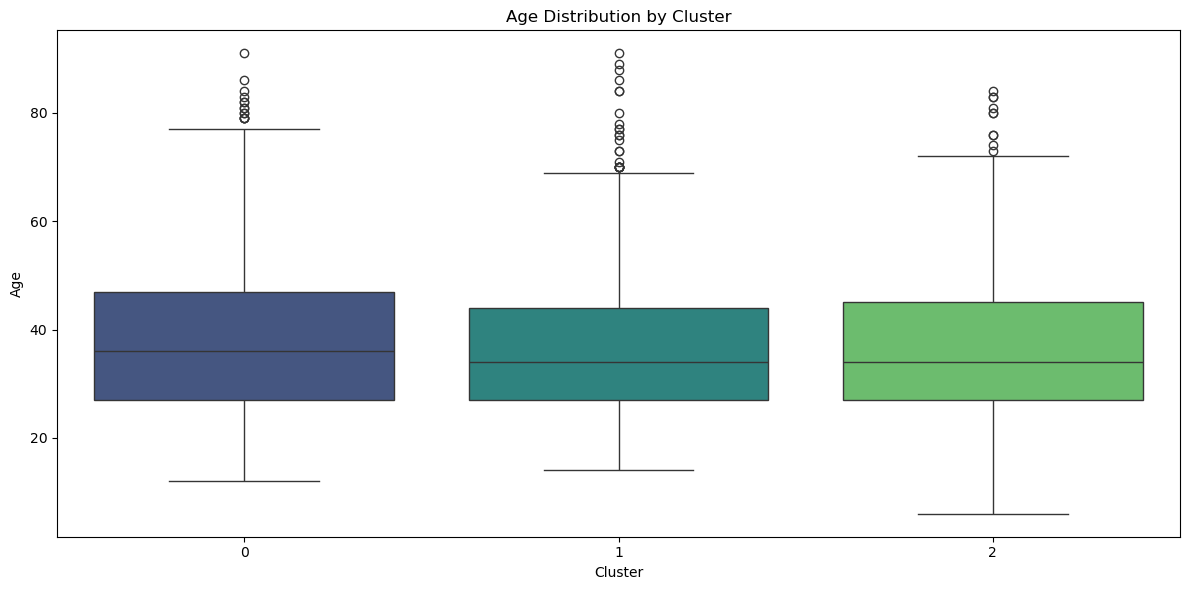

In [39]:
# Plotting Age Distribution by Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='age', data=data, palette='viridis')

# Set plot title and labels
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')

# Adjust layout and save plot
plt.tight_layout()
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/agedist_police.png', bbox_inches='tight', dpi=300)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18632\1765039818.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')


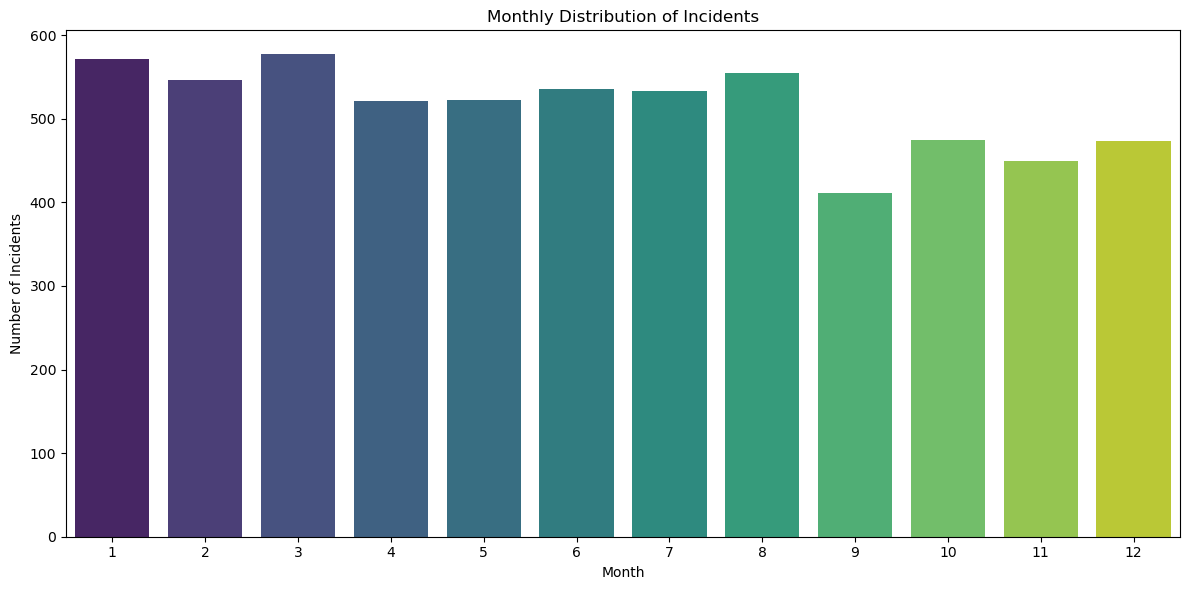

In [41]:
# Convert 'date' column to datetime format if it's not already
data['date'] = pd.to_datetime(data['date'])

# Extract month from the 'date' column
data['month'] = data['date'].dt.month

# Count incidents by month
monthly_counts = data['month'].value_counts().sort_index()

# Plotting Monthly Distribution of Incidents
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')

# Set plot title and labels
plt.title('Monthly Distribution of Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')

# Adjust layout and save plot
plt.tight_layout()
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/monthly_distribution_police.png', bbox_inches='tight', dpi=300)
plt.show()


In [47]:
from geopy.distance import distance
import pandas as pd
import numpy as np

# Assuming your cleaned coordinates data is already defined as `coordinates_clean`
# and contains latitude and longitude with their cluster assignment.

# Fit the k-means model again to get the cluster centers
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(coordinates_clean[['latitude', 'longitude']])

# Get the centroids for each cluster
centroids = kmeans.cluster_centers_

# Step 1: Corrected Function to Calculate Geodesic Distance
def calculate_geodesic(row, centroids):
    try:
        cluster_idx = int(row['cluster'])  # Ensure cluster index is an integer
        if cluster_idx < len(centroids):
            centroid_lat, centroid_lon = centroids[cluster_idx]
            return distance((row['latitude'], row['longitude']), (centroid_lat, centroid_lon)).km
        else:
            return np.nan  # In case cluster index is out of range
    except ValueError:
        return np.nan  # Handle any conversion issues

# Step 2: Calculate Geodesic Distance for Each Incident
coordinates_clean['geodesic_distance'] = coordinates_clean.apply(
    calculate_geodesic, axis=1, centroids=centroids
)

# Display some of the results
print(coordinates_clean.head())


   latitude  longitude  cluster  geodesic_distance
0    25.437    -80.475        0        1255.206557
1    25.461    -80.480        0        1252.516447
2    25.462    -80.493        0        1252.303538
3    25.493    -80.484        0        1248.950813
4    25.507    -80.413        0        1247.985775


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18632\4155973906.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coordinates_clean['geodesic_distance'] = coordinates_clean.apply(


C:\Users\lenovo\AppData\Local\Temp\ipykernel_18632\3969133068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='geodesic_distance', data=coordinates_clean, palette='viridis')


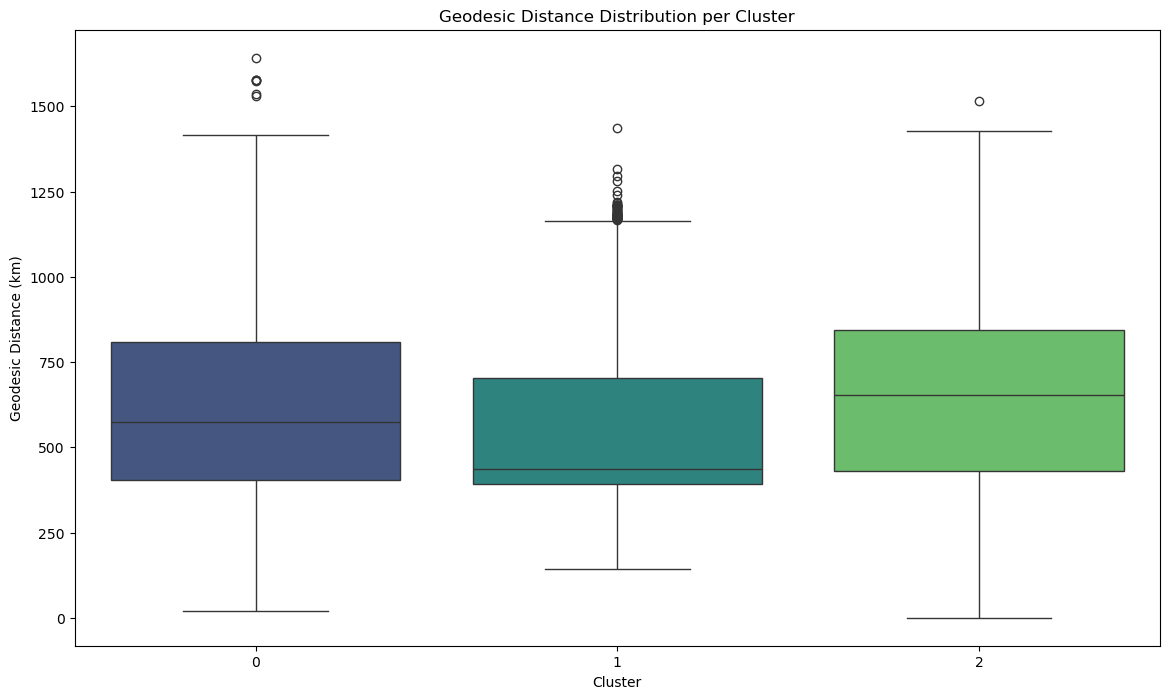

In [49]:
# Plot the Geodesic Distance Distribution for Each Cluster
plt.figure(figsize=(14, 8))
sns.boxplot(x='cluster', y='geodesic_distance', data=coordinates_clean, palette='viridis')

# Set plot title and labels
plt.title('Geodesic Distance Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Geodesic Distance (km)')

# Save the figure
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/geodesic_distance_distribution.png', bbox_inches='tight', dpi=300)
plt.show()
